In [1]:
#Importing the libraries
#Downloading the tensorflow and import keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time
import os, shutil

Using TensorFlow backend.


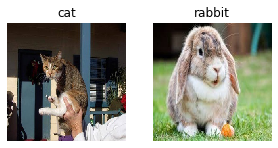

In [2]:
#Source image importing
#The directories may need to be changed if the upload path has been changed
train_src = "CatRabbit/train-cat-rabbit/"
validation_src = "CatRabbit/val-cat-rabbit"
#test_src = "CatRabbit/test-images"
#Limit the categories
image_categories = ["cat","rabbit"]

#Test whether images can be accessed normally
plt.figure(figsize=(10,10))
#For loop to loop though each image category and retrieve the first image.
for i, category in enumerate(image_categories):
  image_folder_path = train_src + '/' + category
  folderimages = os.listdir(image_folder_path)
  img = image.load_img(image_folder_path + '/' + folderimages[0])
  img_arr = image.img_to_array(img)/255.0
  plt.subplot(4,4,i+1)
  plt.imshow(img_arr)
  plt.title(category)
  plt.axis('off')
plt.show()


In [3]:
#Start time measurement
start_time = time.time()

# Create 3 different dataframe
# target_size will affect the image size after resizing
# batch_size will affect the amount of input per once reading, smaller will result in a more accurate result
# class_model will determine the type of label returned, currently return 2D one-hot encoded labels
# classes will determine the content of the label returned, same as image_categories ["cat","rabbit"]
train_gen = ImageDataGenerator(rescale = 1.0/255.0)
tra_img_generator = train_gen.flow_from_directory(
    directory = train_src,target_size = (224,224), batch_size = 32, class_mode='categorical', classes=image_categories)

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_img_generator = train_gen.flow_from_directory(
    directory = validation_src,target_size = (224,224),batch_size = 32, class_mode='categorical', classes=image_categories)

#tes_gen = ImageDataGenerator(rescale = 1.0/255.0)
#tes_img_generator = train_gen.flow_from_directory(
#    directory = test_src,target_size = (224,224),batch_size = 32, class_mode='categorical', classes=image_categories)

#Print out the dataframe structure 
print(tra_img_generator.class_indices)

Found 1595 images belonging to 2 classes.
Found 207 images belonging to 2 classes.
{'cat': 0, 'rabbit': 1}


In [4]:
#Prepare the deep learning network via the simplest sequential model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = 'channels_last'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers

# units will change the dimension of the output space
# activation: similar to the activation in Conv2D
model.add(Dense(units = 128, activation='relu'))
          
# rate control the amount of input unit to drop, in this case 25%
model.add(Dropout(rate = 0.25))

model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 2, activation='softmax'))

# optimizer control the method for finding the best solution on the model
# common options are Adam, RMSprop, Adadelta
# More options can be found on https://keras.io/api/optimizers/

# loss function is used to measure how far an estimated value is from its true value
# common options are mean_squared_error, categorical_crossentropy, huber_loss, sparse_categorical_crossentropy and hinge
# More options can be found on https://keras.io/api/losses/

# metric is used to judge the performance for the model
# the most common option is accuracy (directly compare the predicted value and actual value)
# More options can be found on https://keras.io/api/metrics/
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])


Epoch 1/15
46/46 [==============================] - 67s 1s/step - loss: 1.1257 - accuracy: 0.6353 - val_loss: 0.5929 - val_accuracy: 0.9041
Epoch 2/15
46/46 [==============================] - 67s 1s/step - loss: 0.4390 - accuracy: 0.7867 - val_loss: 0.6122 - val_accuracy: 0.6089
Epoch 3/15
46/46 [==============================] - 66s 1s/step - loss: 0.2814 - accuracy: 0.8875 - val_loss: 0.0967 - val_accuracy: 0.9705
Epoch 4/15
46/46 [==============================] - 67s 1s/step - loss: 0.1889 - accuracy: 0.9275 - val_loss: 0.2549 - val_accuracy: 0.9055
Epoch 5/15
46/46 [==============================] - 66s 1s/step - loss: 0.0992 - accuracy: 0.9652 - val_loss: 0.1611 - val_accuracy: 0.9299
Epoch 6/15
46/46 [==============================] - 66s 1s/step - loss: 0.0398 - accuracy: 0.9857 - val_loss: 0.0185 - val_accuracy: 0.9410
Epoch 7/15
46/46 [==============================] - 67s 1s/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.3646 - val_accuracy: 0.9016
Epoch 8/15
46/46 [=

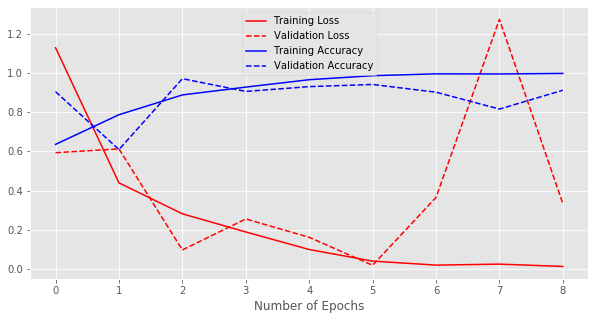

The seconds required to train this CNN model is:  601.9400169849396


In [6]:
hist = model.fit(tra_img_generator, 
                 epochs=15, 
                 verbose=1, 
                 validation_data=val_img_generator, 
                 steps_per_epoch = 1500//32, 
                 validation_steps = 300//32, 
                 callbacks=[EarlyStopping(monitor="val_loss", mode='auto', patience=3)])

processingTime = time.time() - start_time

# Performance evaluation statistic
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()
print("The seconds required to train this CNN model is: ", processingTime)

The following is the prediction

The seconds required to train this CNN model is:  0.7427821159362793


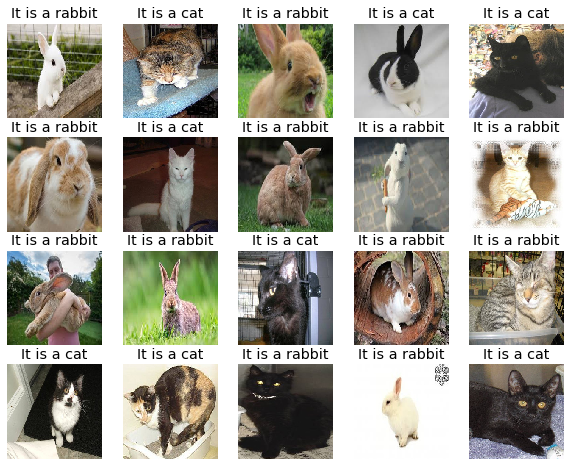

In [7]:
import glob
fig = plt.figure(figsize=(10, 8))
rows = 4
columns = 5
count = 1

print("The following is the prediction\n")

predict_start_time = time.time()
for i in glob.glob('CatRabbit/test-images/*.jpg') :
    img = image.load_img(i, target_size=(224, 224))
    x = np.expand_dims(image.img_to_array(img), axis=0)

    images = np.vstack([x])
    classes = model.predict_classes(x)
    if classes == 1:
        fig.add_subplot(rows, columns, count)
        plt.imshow(img)
        plt.axis('off')
        plt.title("It is a rabbit")
        count = count + 1
    
    if classes == 0:
        fig.add_subplot(rows, columns, count)
        plt.imshow(img)
        plt.axis('off')
        plt.title("It is a cat")
        count = count + 1

PredictTime = time.time() - predict_start_time
print("The seconds required to predict is: ", PredictTime)